In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
from prophet import Prophet

ModuleNotFoundError: No module named 'prophet'

In [3]:
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/refs/heads/main/airquality.csv'
df = pd.read_csv(url)
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,2004-03-10,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2004-03-10,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,2004-03-10,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,2004-03-10,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [4]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


In [5]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [8]:
df_new = df.copy()

In [10]:
df.isnull().any()

Date             False
Time             False
CO(GT)           False
PT08.S1(CO)      False
NMHC(GT)         False
C6H6(GT)         False
PT08.S2(NMHC)    False
NOx(GT)          False
PT08.S3(NOx)     False
NO2(GT)          False
PT08.S4(NO2)     False
PT08.S5(O3)      False
T                False
RH               False
AH               False
dtype: bool

In [11]:
df.drop(['PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)','T','RH','AH'],axis=1,inplace=True)

In [12]:
df.head(5)

,Date,Time,CO(GT),NO2(GT)
0,2004-03-10,18:00:00,2.6,113
1,2004-03-10,19:00:00,2.0,92
2,2004-03-10,20:00:00,2.2,114
3,2004-03-10,21:00:00,2.2,122
4,2004-03-10,22:00:00,1.6,116


In [13]:
df['datetime']=pd.to_datetime(df['Date']+" "+df['Time'])
df=df.sort_values('datetime')

In [14]:
df.head()

,Date,Time,CO(GT),NO2(GT),datetime
0,2004-03-10,18:00:00,2.6,113,2004-03-10 18:00:00
1,2004-03-10,19:00:00,2.0,92,2004-03-10 19:00:00
2,2004-03-10,20:00:00,2.2,114,2004-03-10 20:00:00
3,2004-03-10,21:00:00,2.2,122,2004-03-10 21:00:00
4,2004-03-10,22:00:00,1.6,116,2004-03-10 22:00:00


In [15]:
df.drop(['Date','Time'],axis=1,inplace=True)

In [16]:
df.head()

,CO(GT),NO2(GT),datetime
0,2.6,113,2004-03-10 18:00:00
1,2.0,92,2004-03-10 19:00:00
2,2.2,114,2004-03-10 20:00:00
3,2.2,122,2004-03-10 21:00:00
4,1.6,116,2004-03-10 22:00:00


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   CO(GT)    9357 non-null   float64       
 1   NO2(GT)   9357 non-null   int64         
 2   datetime  9357 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 219.4 KB


In [18]:
df_2=df.copy()

In [24]:
df_2.head()

,CO(GT),NO2(GT),datetime
0,2.6,113,2004-03-10 18:00:00
1,2.0,92,2004-03-10 19:00:00
2,2.2,114,2004-03-10 20:00:00
3,2.2,122,2004-03-10 21:00:00
4,1.6,116,2004-03-10 22:00:00


In [22]:
df.drop('CO(GT)',axis=1,inplace=True)

In [23]:
df.head()

,NO2(GT),datetime
0,113,2004-03-10 18:00:00
1,92,2004-03-10 19:00:00
2,114,2004-03-10 20:00:00
3,122,2004-03-10 21:00:00
4,116,2004-03-10 22:00:00


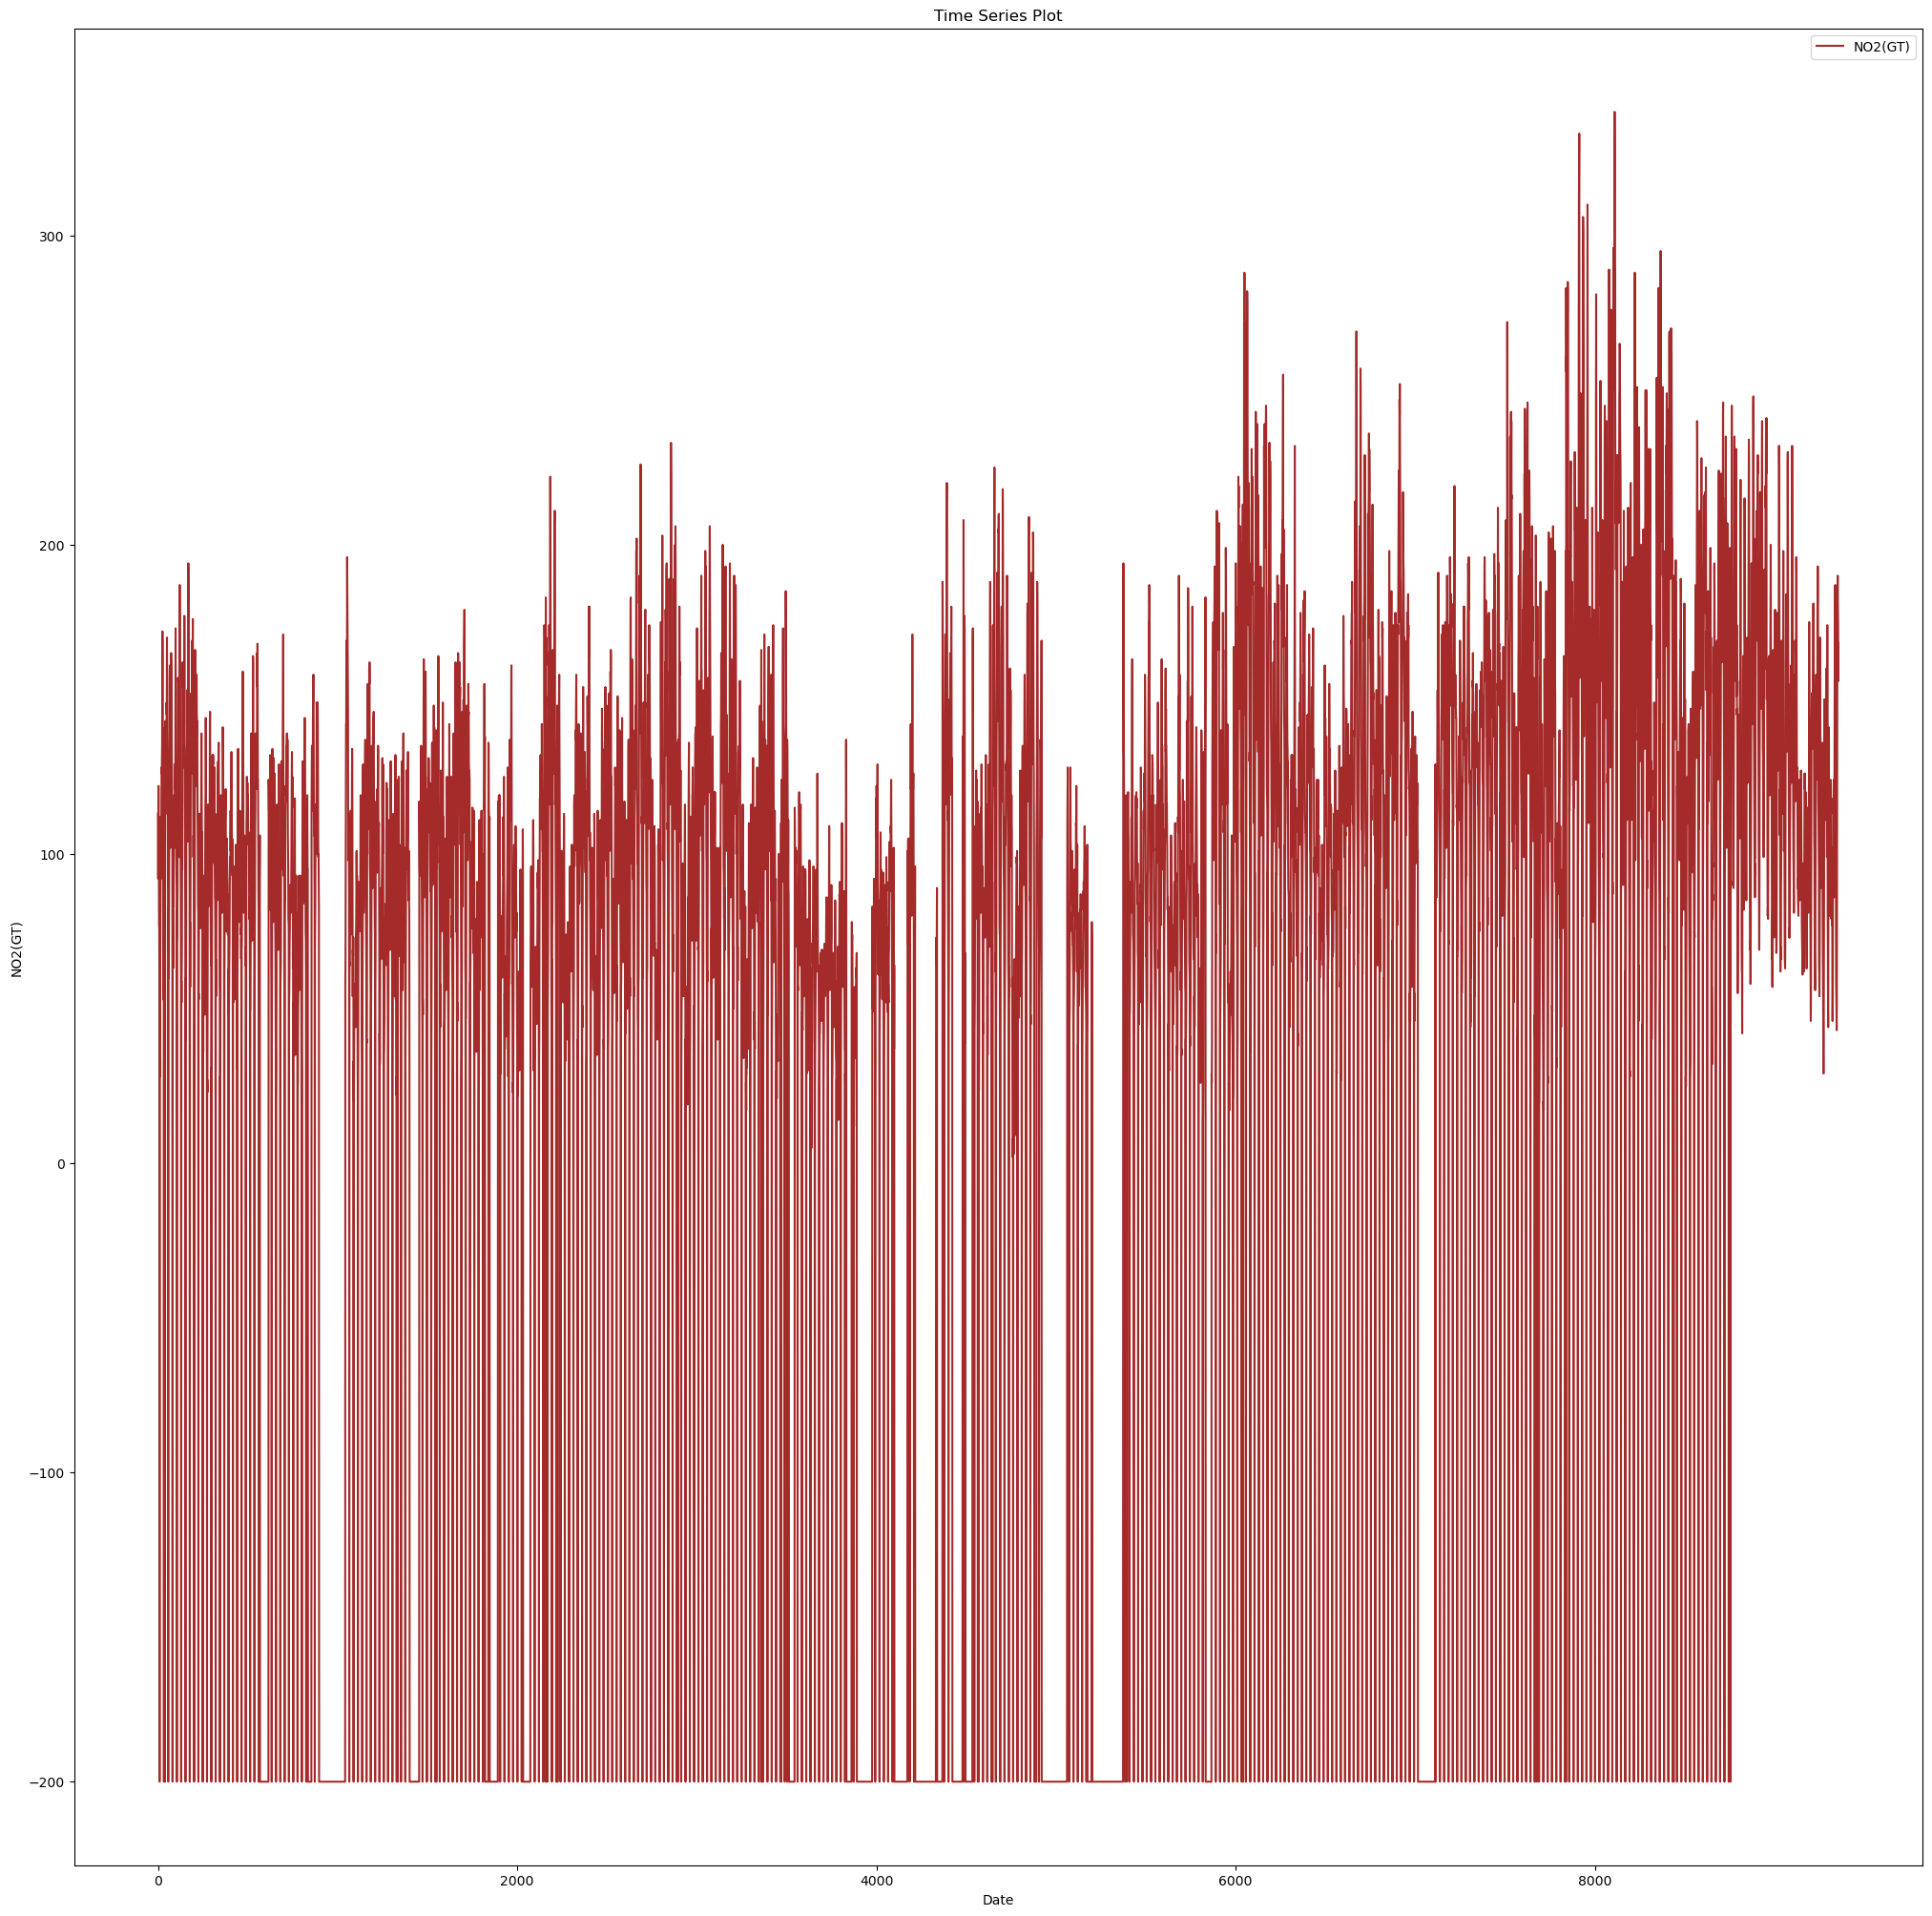

In [26]:
plt.figure(figsize=(25,25))
plt.plot(df.index,df['NO2(GT)'],label='NO2(GT)',color='brown')
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('NO2(GT)')
plt.legend()
plt.show()

In [27]:
df_2.drop('NO2(GT)',axis=1,inplace=True)

In [28]:
df_2.head()

,CO(GT),datetime
0,2.6,2004-03-10 18:00:00
1,2.0,2004-03-10 19:00:00
2,2.2,2004-03-10 20:00:00
3,2.2,2004-03-10 21:00:00
4,1.6,2004-03-10 22:00:00


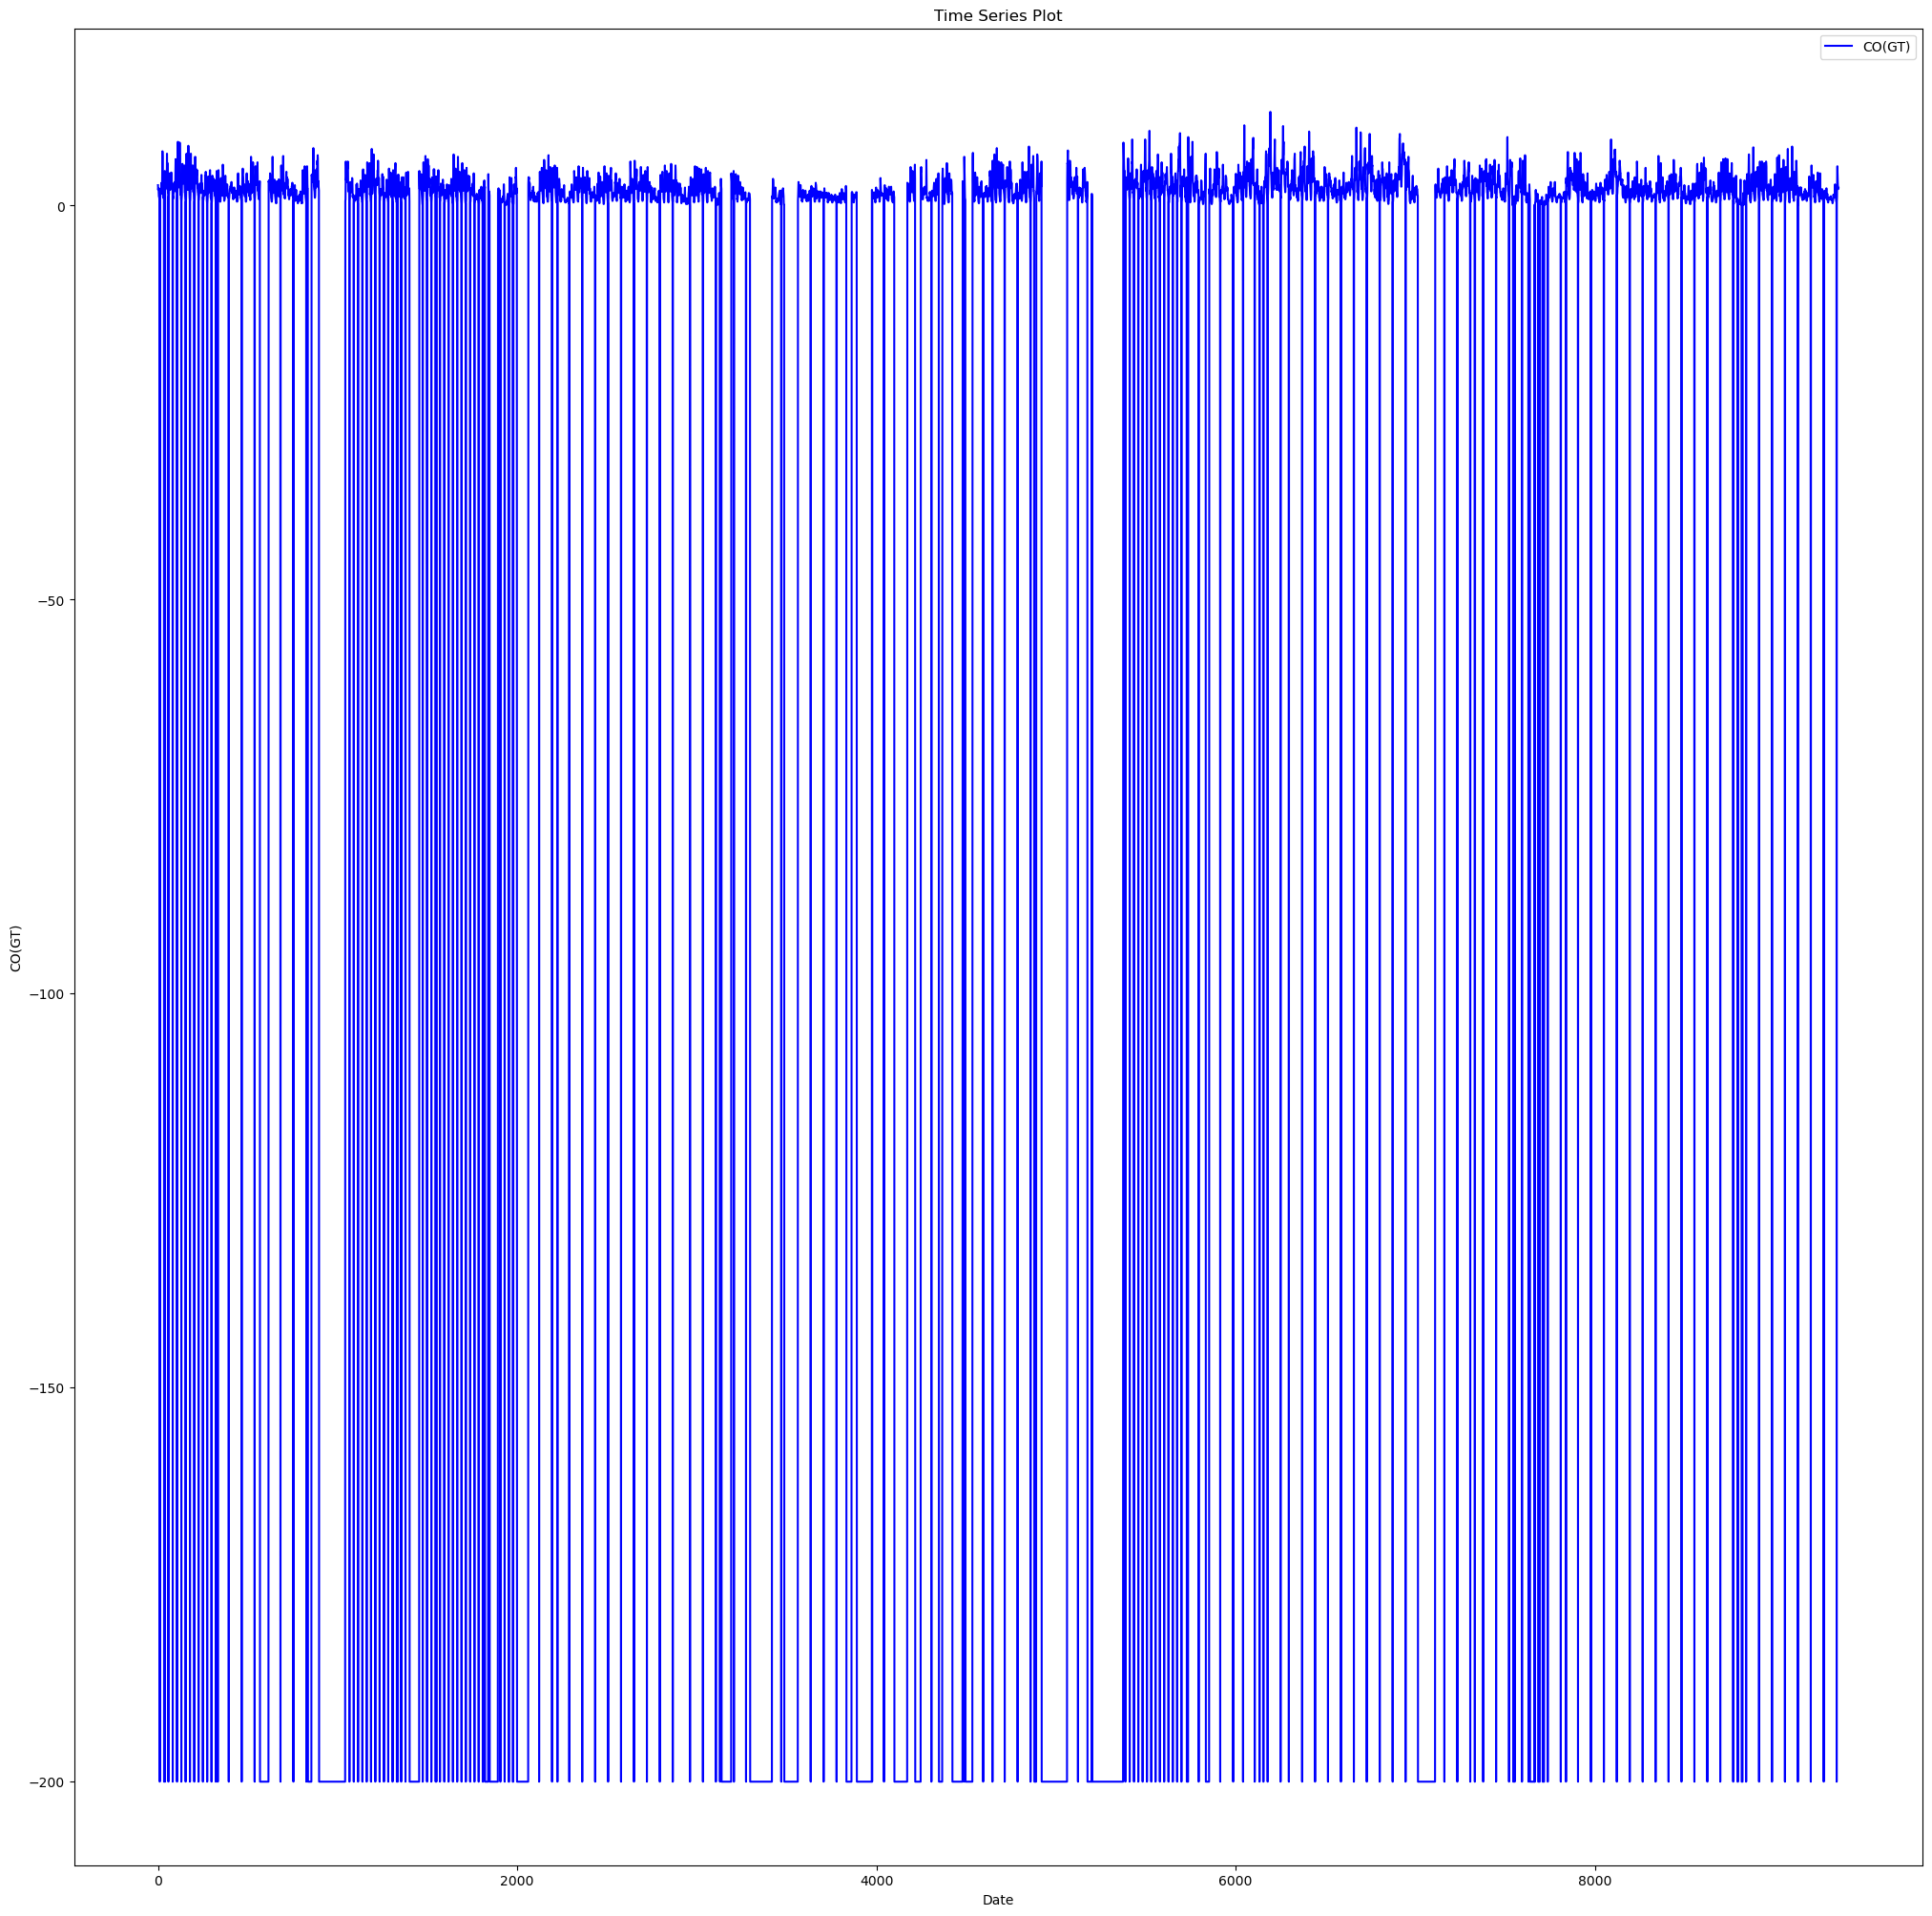

In [30]:
plt.figure(figsize=(25,25))
plt.plot(df_2.index,df_2['CO(GT)'],label='CO(GT)',color='blue')
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('CO(GT)')
plt.legend()
plt.show()

In [31]:
df.head()

,NO2(GT),datetime
0,113,2004-03-10 18:00:00
1,92,2004-03-10 19:00:00
2,114,2004-03-10 20:00:00
3,122,2004-03-10 21:00:00
4,116,2004-03-10 22:00:00


In [32]:
#df_co = df.reset_index()[['datetime', 'NO2(GT)']] 
df.columns = ['y', 'ds']

In [33]:
#df_3 = df_2.reset_index()[['datetime', 'CO(GT)']] 
df_2.columns = ['y', 'ds']

In [34]:
model=Prophet(interval_width=0.95,daily_seasonality=True)
model.fit(df)

NameError: name 'Prophet' is not defined